In [1]:
import pandas as pd
import numpy as np

In [27]:
data = pd.ExcelFile('/home/xenakas/Desktop/Git/hierarchical_modelling/data/rus/rosstat/gdp_rus_2004.xlsx')

data.sheet_names

df1 = data.parse('Лист1') 

df1 = df1.dropna(how='all') 

df1 = df1.drop(df1.index[[0, 1, 2]]) 

df1 = df1.drop(df1.columns[1], axis = 1) 

#df1.iat[0,0] = 'Субъект'

df1.columns = df1.iloc[0]

df1 = df1.drop(df1.index[[0, 1]]) # drop colnames and total by RF

df1 = df1.set_index(df1.iloc[:,0].values)

df1 = df1.drop(df1.columns[0], axis = 1) 


df1 = df1.stack().to_frame()

df1.columns = ['value']

df1['year'] = [2004] * len(df1.values)

In [ ]:
gdp_rus = pd.DataFrame()

for yeah in range(2004,2017): 
    file_name = '/home/xenakas/Desktop/Git/hierarchical_modelling/data/rus/rosstat/gdp_rus_' + str(yeah) + '.xlsx' 
    data = pd.ExcelFile(file_name)
    df = data.parse('Лист1') 

    df = df.dropna(how='all') 
    df = df.drop(df.index[[0, 1, 2]]) 
    df = df.drop(df.columns[1], axis = 1) 
    #df.iat[0,0] = 'Субъект'

    df.columns = df.iloc[0]
    df = df.drop(df.index[[0, 1]]) # drop colnames and total by RF

    df = df.set_index(df.iloc[:,0].values)
    df = df.drop(df.columns[0], axis = 1) 
    
    df = df.stack().to_frame()
    df.columns = ['value']
    df['year'] = [yeah] * len(df.values)
    
    gdp_rus = gdp_rus.append(df)


In [3]:
#gdp_rus.to_csv("gdp_unstacked.csv")
df_gdp = pd.read_csv('/home/xenakas/Desktop/Git/hierarchical_modelling/data/rus/gdprus_unstacked.csv')

#df_gdp.value = df_gdp.value.astype(float)

df_gdp['value'] = pd.to_numeric(df_gdp['value'], errors='coerce')

In [4]:

states = ['Центральный федеральный округ',       'Северо-Западный федеральный округ', 
      'Южный федеральный округ', 'Северо-Кавказский федеральный округ', 'Приволжский федеральный округ', 'Уральский федеральный округ',
       'Сибирский федеральный округ', 'Дальневосточный федеральный округ']

extras =    [  ' в том числе Ненецкий автономный округ',      '   в том числе Ханты-Мансийский автономный округ',      '  в т.ч. Ненецкий автономный округ', '   в т.ч. Ханты-Мансийский автономный округ-Югра', '    в т.ч. Ненецкий автономный округ', '  в т.ч. Ханты-Мансийский АО',  '  в т.ч. Ханты-Мансийский автономный округ', '  Архангельская область без Ненецкого авт.округа',        '           Тюменская область (без Ханты-Мансийского авт.округа-Югра и Ямало-Ненецкого авт.округа)',  '  Архангельская область без авт.округа'   ]

cities = [  'Москва',    'Санкт-Петербург', 'Севастополь']

df_gdp =  df_gdp[df_gdp['geo'].isin(states) == False]

df_gdp =  df_gdp[df_gdp['geo'].isin(extras) == False]

ind   = ['область', ' ', 'округ', 'автономный',  'автономная', 'край', 'республика', 'Республика', 
         'АО', '(Якутия)', 'г.', ' ', '.']

for stro in ind:
    df_gdp['geo']  = [i.replace(stro, '') for i in df_gdp['geo']]

df_gdp =  df_gdp[df_gdp['geo'].isin(cities) == False]    

len(df_gdp.geo.unique()) == 85-4

indus = ['; обязательное социальное страхование', '; социальное страхование', ';  социальное страхование']

for stro in indus:
    df_gdp['ind']  = [i.replace(stro, '') for i in df_gdp['ind']]

    

In [5]:
df_gdp = df_gdp[df_gdp['ind'] != 'Деятельность домашних хозяйств']

In [9]:
df_gdp = df_gdp[df_gdp['geo'] != 'Ямало-Ненецкий']

In [11]:
pivot_gdp = pd.pivot_table(df_gdp, index='year', columns=[ 'geo', 'ind'], values = 'value')

pivot_gdp

pivot_gdp.to_csv("gdprus_stacked_by_geo.csv")

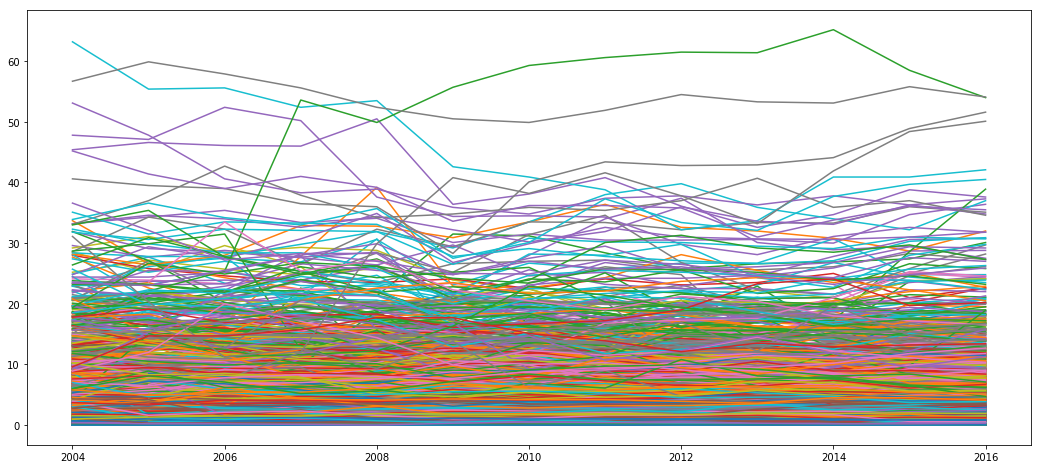

In [13]:
import matplotlib.pyplot as pp

pp.figure(figsize = (18, 8))
pp.plot(pivot_gdp);



In [91]:
pivot_geosum = pd.pivot_table(df_gdp, index='year', columns='geo', aggfunc=np.sum) 

pivot_geosum.head(3)


value                                                                    \
geo  Адыгея  Алтай Алтайский Амурская Архангельская Астраханская Башкортостан   
year                                                                            
2004  100.0  100.0     100.0    100.0         100.0        100.0        100.0   
2005  100.0  100.0     100.0    100.0         100.0        100.0        100.0   
2006  100.0  100.0     100.0    100.0         100.0        100.0        100.0   

                                       ...                             \
geo  Белгородская Брянская Бурятия     ...     Удмуртская Ульяновская   
year                                   ...                              
2004        100.0    100.0   100.0     ...          100.0       100.0   
2005        100.0    100.0   100.0     ...          100.0       100.0   
2006        100.0    100.0   100.0     ...          100.0       100.0   

                                                                    \
geo  Хабаровский Хакасия Челябинская Чеченская Чувашская Чукотский   
year                                                                 
2004       100.0   100.0       100.0       0.0     100.0     100.0   
2005       100.0   100.0       100.0     100.0     100.0     100.0   
2006       100.0   100.0       100.0     100.0     100.0     100.0   

                                 
geo  Ямало-Ненецкий Ярославская  
year                             
2004          100.0       100.0  
2005          100.0       100.0  
2006          100.0       100.0  

[3 rows x 81 columns]